In [1]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
tra_url="/content/training_set/training_set"
tes_url="/content/test_set/test_set"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(tra_url,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(tes_url,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [14]:
# Build the model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
epochs = 10
steps_per_epoch = min(100, len(train_generator))
validation_steps = min(50, len(test_generator))

history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=validation_steps)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 269ms/step - accuracy: 0.4949 - loss: 0.7780 - val_accuracy: 0.5188 - val_loss: 0.6862
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.5548 - loss: 0.6852 - val_accuracy: 0.5910 - val_loss: 0.6890
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.5351 - loss: 0.6913 - val_accuracy: 0.5581 - val_loss: 0.6866
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 622ms/step - accuracy: 0.5495 - loss: 0.6901 - val_accuracy: 0.5792 - val_loss: 0.6825
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.5720 - loss: 0.6740 - val_accuracy: 0.6181 - val_loss: 0.6581
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.6279 - loss: 0.6520 - val_accuracy: 0.5957 - val_loss: 0.6567
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 237ms/step - accuracy: 0.6043 - loss: 0.6605 - val_accuracy: 0.6313 - val_loss: 0.6471
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.6229 - loss: 0.

In [9]:
# Function to load and preprocess a single image
def load_and_prep_image(filepath):
    img = load_img(filepath, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    return img_array


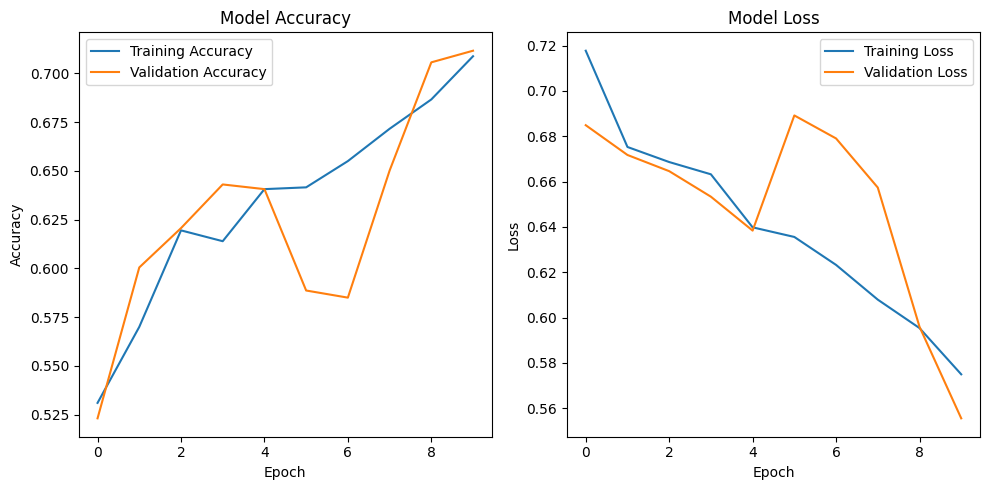

In [10]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()